<h1 style="color: #c0392b;">Aula Prática - Framework Java Collections</h1>
<h2>Formato de arquivo <i>Comma-separated Value</i> (CSV)</h2>.

<small>
<p><strong>IMPORTANTE</strong>: O comando '%%file' é usado no Python para criar arquivos .java no diretório onde este notebook está salvo. Os arquivos criados são nomeados conforme o identificador fornecido após o comando '%%file'.</p>
</small>

<h3>Arquivo CSV</h3>

<p>Um arquivo CSV é um formato de arquivo que é normalmente usado para troca de dados entre aplicações diferentes. Um arquivo CSV possui a seguinte estrutura:</p>

<ul>
    <li>Cada linha do arquivo armazena um registro</li>
    <li>Os registros possuem campos;</li>
    <li>Geralmente, os campos são separados por vírgula (,) ou ponto e vírgula (;).</li>
</ul>

<p>No <a href="#codigo1">Código 1</a>, podemos observar a estrutura de um arquivo CSV (<a href="https://github.com/jjbaqueta/EPOD/blob/main/arquivosCSV/contas.csv">contas.csv</a>), onde cada linha representa uma conta, definida por 4 campos: número, nome do titular, tipo da conta e saldo. Note que a primeira linha do arquivo indica os nomes dos campos, e cada linha subsequente é um registro, com os valores separados por vírgulas.</p>

<a id='codigo1'></a>
<h4 style="color: #2d3436;"><strong>Código 1</strong>: Exemplo de arquivo CSV.</h4>

In [2]:
%%file contas.csv
Número, Nome do Titular, Tipo da Conta, Saldo
629818096,João Rodrigues,investimento,8236.93
494106033,Juliana Ferreira,corrente,1694.04
694382511,Lucas Almeida,investimento,5308.11
388548555,Maria Costa,investimento,1322.19
731612501,Sandra Araújo,poupança,823.17
853493938,Pedro Oliveira,investimento,6553.99
483101668,Sandra Nunes,poupança,7126.15
748490672,Sandra Araújo,investimento,699.11
939639092,Juliana Nunes,corrente,9180.69
820495743,Lucas Nunes,poupança,8652.3
175591069,João Almeida,corrente,4915.03
123854778,Ana Pereira,poupança,8073.06
263652112,Maria Araújo,investimento,5505.5
394515942,Ana Silva,corrente,57.8
669468888,Mariana Araújo,poupança,4243.33
082016838,Mariana Pereira,investimento,2932.13
799827997,Rafael Costa,corrente,6508.9
154372263,João Pereira,corrente,665.68
512487744,Lucas Oliveira,poupança,9703.42
332445007,Sandra Costa,poupança,6273.53
650529155,João Nunes,corrente,8505.09
707495716,Lucas Araújo,investimento,8551.92
936693710,Rafael Nunes,poupança,6675.48
660257010,João Oliveira,corrente,3391.75
422179909,João Pereira,corrente,4898.15
122659665,Ana Costa,poupança,4669.86
641004993,Rafael Silva,corrente,4249.43
918543125,Rafael Rodrigues,investimento,2937.6
375777008,Pedro Silva,poupança,5248.4
215690752,Maria Pereira,poupança,6568.96
702051328,Pedro Oliveira,investimento,2786.85
804180848,Lucas Costa,corrente,1112.98
608349407,Lucas Rodrigues,corrente,1279.75
936485352,Juliana Costa,poupança,9888.76
562802698,João Oliveira,corrente,2192.26
617037455,Pedro Costa,investimento,6595.07
632473936,Lucas Silva,corrente,6683.87
076920046,Ana Nunes,corrente,8265.53
178173591,Lucas Ferreira,poupança,9863.93
087881468,Sandra Oliveira,investimento,1324.44
583715078,Ana Costa,corrente,4383.49
594800421,Lucas Rodrigues,investimento,1986.21
019969506,Carlos Araújo,poupança,507.14
774629423,Rafael Rodrigues,investimento,4645.29
342496499,Sandra Nunes,poupança,7036.52
989178983,Ana Santos,investimento,3234.42
258643306,Maria Santos,poupança,3518.09
181801767,Pedro Santos,investimento,3451.77
795450164,Rafael Araújo,poupança,3994.01
971029180,Carlos Silva,corrente,1095.21

Writing contas.csv


<h3>Carregando os Dados do Arquivo</h3>

<p>No Java, você pode ler um arquivo CSV usando classes como <a href="https://docs.oracle.com/en/java/javase/11/docs/api/java.base/java/io/class-use/BufferedReader.html">BufferedReader</a>.</p>

<p>No <a href="#codigo2">Código 2</a>, a classe BufferedReader é utilizada para ler o arquivo de contas descrito anteriormente. Nesse caso, o arquivo é lido linha por linha. Note que o comando <a href="https://javadoc.scijava.org/Java11/java.base/java/lang/String.html#split(java.lang.String)">'split(",")'</a> divide uma linha em campos, usando a vírgula como delimitador.</p>

<p>Os registros do arquivo são convertidos para objetos do tipo Conta à medida que as linhas são processadas. A classe Conta é apresentada no <a href="#codigo3">Código 3</a>.</p>

<a id='codigo2'></a>
<h4 style="color: #2d3436;"><strong>Código 2</strong>: Leitura do arquivo CSV.</h4>

In [4]:
%%file LeitorCSV.java

import java.io.BufferedReader;
import java.io.FileReader;
import java.io.IOException;
import java.util.ArrayList;
import java.util.List;

public abstract class LeitorCSV {

    /**
     * Método para ler o arquivo CSV com os registros das contas
     * 
     * @param caminhoArq - caminho para o arquivo CSV de entrada
     * @return uma lista com objetos do tipo Conta
     */
    public static List<Conta> lerArquivo(String caminhoArq) {
        List<Conta> contas = new ArrayList<>();

        try (BufferedReader br = new BufferedReader(new FileReader(caminhoArq))) {
            String linha;
            
            // Pular a primeira linha (cabeçalho)
            br.readLine();
            
            // Lendo os registros
            while ((linha = br.readLine()) != null) {
                String[] campos = linha.split(",");
                Conta conta = new Conta(campos[0], campos[1], campos[2], Double.parseDouble(campos[3]));
                contas.add(conta);
            }
        } 
        catch (IOException e) {
            e.printStackTrace();
        }
        return contas;
    }
    
    public static void main(String[] args){
        List<Conta> contas = lerArquivo("contas.csv");
        for (Conta conta : contas) {
            System.out.println(conta);
        }
    }
}

Writing LeitorCSV.java


<a id='codigo3'></a>
<h4 style="color: #2d3436;"><strong>Código 3</strong>: Classe Conta.</h4>

In [ ]:
%%file Conta.java

public class Conta implements Comparable<Conta> {
    private String id;
    private String nomeTitular;
    private String tipo;
    private Double saldo;

    public Conta(String id, String nomeTitular, String tipo, Double saldo) {
        this.id = id;
        this.nomeTitular = nomeTitular;
        this.tipo = tipo;
        this.saldo = saldo;
    }

    public String getId() {
        return id;
    }

    public String getNomeTitular() {
        return nomeTitular;
    }

    public String getTipo() {
        return tipo;
    }

    public Double getSaldo() {
        return saldo;
    }
    
    @Override
    public int hashCode() {
        return Objects.hash(id);
    }

    @Override
    public boolean equals(Object obj) {
        if (this == obj)
            return true;
        if (obj == null)
            return false;
        if (getClass() != obj.getClass())
            return false;
        Conta other = (Conta) obj;
        return Objects.equals(id, other.getId());
    }

    @Override
    public int compareTo(Conta outraConta) {
        return this.nomeTitular.compareTo(outraConta.getNomeTitular());
    }

    @Override
    public String toString() {
        return "Conta: " + id + ", " + nomeTitular + ", " + tipo + ", " + saldo;
    }
}

Writing Conta.java


<h3>Java Collections Framework</h3>

<p> O <a href="https://docs.oracle.com/en/java/javase/11/docs/api/java.base/java/util/Collections.html"> Java Collections Framework</a> é um conjunto de classes e interfaces padronizadas para manipulação de coleções de objetos. Possui uma série de estruturas de dados para serem aplicadas nas mais diversas situações.</p>

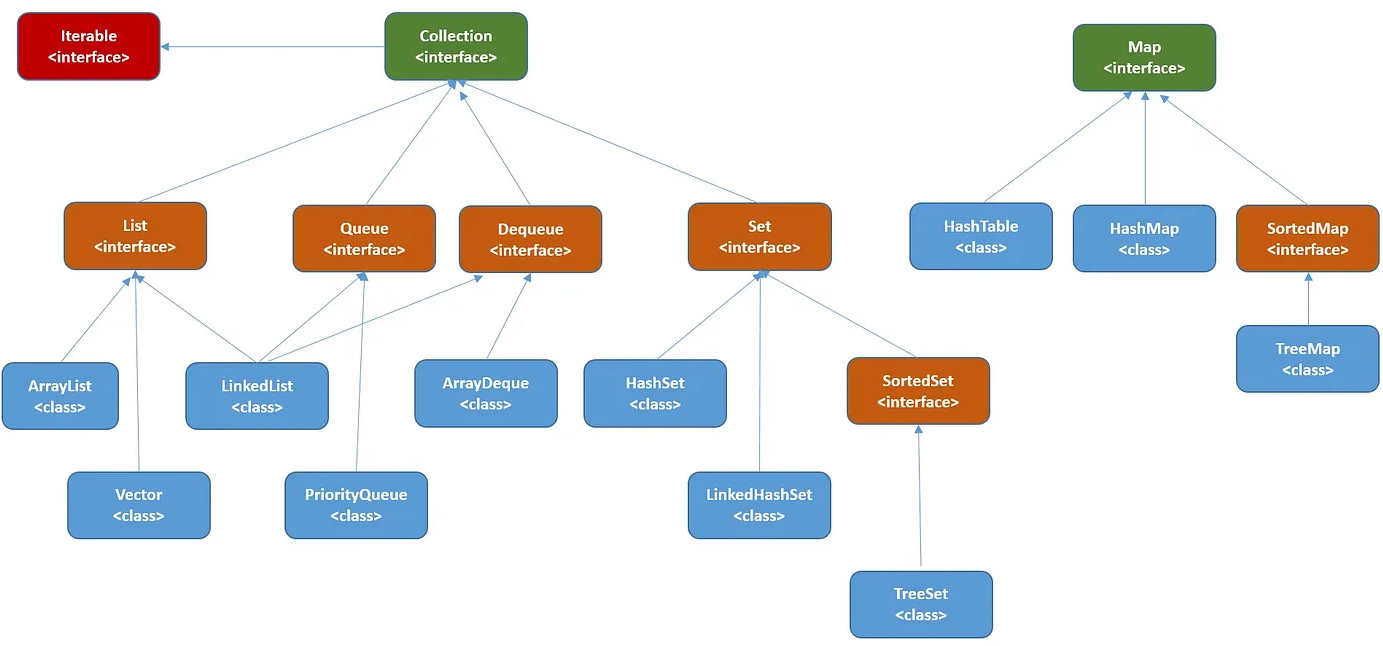
Hierarquia do Framework. Fonte: <a href="https://nisha-jha.medium.com/collection-framework-in-java-2e0cd92646a2">Nisha, 2024</a>

<p>No <a href="#codigo4">Código 4</a>, o Java Collections Framework é utilizado para manipular a lista de contas carregadas a partir do arquivo CSV. Note que o framework dispõe de várias operações que podem ser aplicadas às estruturas de dados descritas na hierarquia acima, como ordenação (<a href="https://docs.oracle.com/en/java/javase/11/docs/api/java.base/java/util/Collections.html#sort(java.util.List)">sort</a>), busca pelo maior elemento (<a href="https://docs.oracle.com/en/java/javase/11/docs/api/java.base/java/util/Collections.html#max(java.util.Collection,java.util.Comparator)">max</a>), busca pelo menor elemento (<a href="https://docs.oracle.com/en/java/javase/11/docs/api/java.base/java/util/Collections.html#min(java.util.Collection,java.util.Comparator)">min</a>) e busca binária (<a href="https://docs.oracle.com/en/java/javase/11/docs/api/java.base/java/util/Collections.html#binarySearch(java.util.List,T,java.util.Comparator)">binarySearch</a>).</p>

<a id='codigo4'></a>
<h4 style="color: #2d3436;"><strong>Código 4</strong>: Buscando um objeto do tipo Produto.</h4>

In [6]:
%%file Main.java

import java.util.Collections;
import java.util.Comparator;
import java.util.List;

public class Main {

    /**
     * Essa função exibe todas as contas da lista, uma conta por linha.
     * @param contas - contas lidas do arquivo de entrada.
     */
    public static void exibirContas(List<Conta> contas) {
        for (Conta conta : contas) {
            System.out.println(conta);
        }
    }

    public static void main(String[] args) {
        List<Conta> contas = LeitorCSV.lerArquivo("contas.csv");
        
        // Exibindo as contas ordenads por id (ordem natural da classe Conta)
        System.out.println("Contas ordenadas por id:");
        Collections.sort(contas);
        exibirContas(contas);

        // Comparando as contas pelo identificador (id)
        System.out.println("\nConsulta por id mais baixo e mais alto:");
        System.out.println("id mais baixo: " + Collections.min(contas));
        System.out.println("id mais alto: " + Collections.max(contas));

        // Implementação de um comparador para o atributo saldo
        Comparator<Conta> saldoComparator = Comparator.comparing(Conta::getSaldo);
        
        System.out.println("\nConsulta por menor e maior saldo:");
        System.out.println("menor saldo: " + Collections.min(contas, saldoComparator));
        System.out.println("maior saldo: " + Collections.max(contas, saldoComparator));

        // Buscando uma conta qualquer por id (ordem natural da classe Conta):
        System.out.println("\nBusca pela conta com id = 820495743:");
        int index = Collections.binarySearch(contas, new Conta("820495743", null, null, null));
        
        if (index >= 0) {
            System.out.println("Conta encontrada: " + contas.get(index));
        } 
        else {
            System.out.println("Conta não encontrada!");
        }
    }
}


Overwriting Main.java


<h3>Interface Comparator</h3>

<p>A interface <a href="https://docs.oracle.com/en/java/javase/11/docs/api/java.base/java/util/Comparator.html">Comparator</a> permite comparar dois objetos de um determinado tipo para determinar sua ordem. É frequentemente usada em operações de ordenação e pode ser implementada de diferentes maneiras:</p>

<ul>
<li><strong>Criação Manual</strong>: o comparador é implementado de forma explícita. Essa abordagem é ilustrada abaixo, onde um comparador para o atributo saldo é implementado na chamada do método sort:
<pre>
<code>
Collections.sort(contas, new Comparator&lt;Conta&gt;() {
    @Override
    public int compare(Conta conta1, Conta conta2) {
        return conta1.getSaldo().compareTo(conta2.getSaldo());
    }
});
</code>
</pre>
</li>

<li><strong>Função lambda</strong>: o comparador é implementado com base em uma expressão lambda:
<pre>
<code>
Collections.sort(contas, (conta1, conta2) -> 
    conta1.getTipo().compareTo(conta2.getTipo()));
</code>
</pre>
</li>
    
<li><strong>Método comparing</strong>: o comparador é implementado com base no método estático <a href="https://docs.oracle.com/en/java/javase/11/docs/api/java.base/java/util/Comparator.html#comparing(java.util.function.Function)">comparing</a>. Essa abordagem foi utilizada no <a href="#codigo4">Código 4</a> para encontrar a conta com o maior e o menor saldo. A notação <span style="color: #c0392b">Conta::getSaldo</span> refere-se a um método que retorna o saldo de uma instância da classe Conta:
<pre>
<code>
Comparator<Conta> saldoComparator = Comparator.comparing(Conta::getSaldo);
</code>
</pre> 
</li>
</ul>